# Titanic

Let's go)

------------


**Часть 1: Анализ данных:**

1) Анализ особенностей.

2) Поиск любых отношений или трендов с учетом множества фич.

**Часть 2: Разработка функций и очистка данных:**

1) Добавление нескольких фич.

2) Удаление избыточных фич.

3) Преобразование фич в подходящую вид для моделирования.

**Часть 3: Прогностическое моделирование**

1) Выполнение основных алгоритмов.

2) Кросс-валидация.

3) Ensembling.

4) Важные особенности Экстракция.

## Часть 1: Анализ данных:

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Посмотрим сколько у нас пропусков в данных.

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Возраст (Age), каюта (Cabin) и порт высадки (Embarked) имеют NaN значения. Попробуем это пофиксить.

**Статистика выживших:**

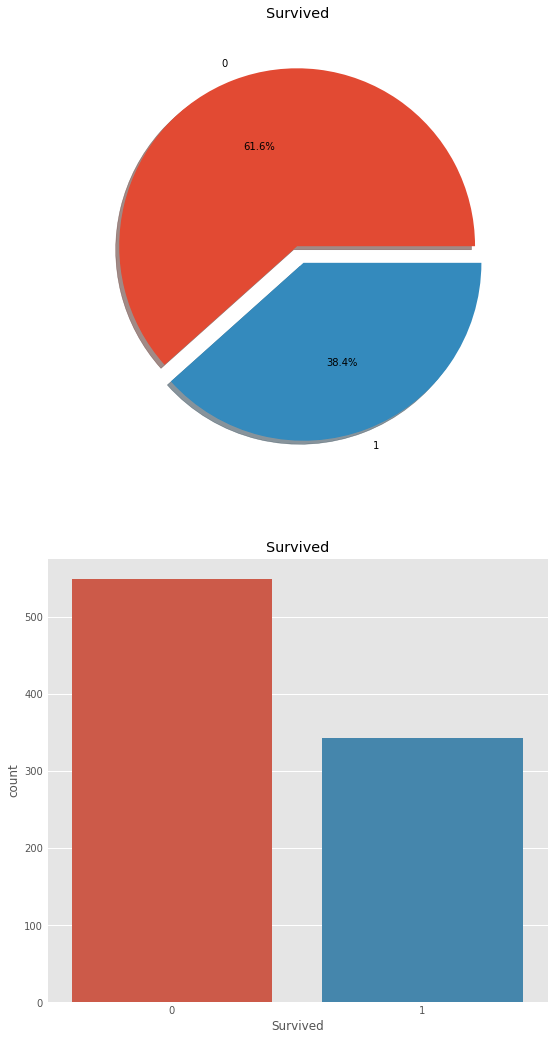

In [13]:
f,ax=plt.subplots(2,1,figsize=(8,18))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Из 891 пассажира в тренировочной выборке выживших всего ~350 человек.Тоесть 38,4% от всей тренеровочной выборки пережили катастрофу. Нужно пойти глубже, чтобы лучше понять данные и посмотреть, какие категории пассажиров выжили, а какие нет.

Мы постараемся проверить уровень выживаемости, используя различные особенности набора данных. Некоторые из особенностей - Пол (Sex), Порт Высадки (Embarked), Возраст (Age) и т.д.

## Анализ фич

### Пол (Sex)

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

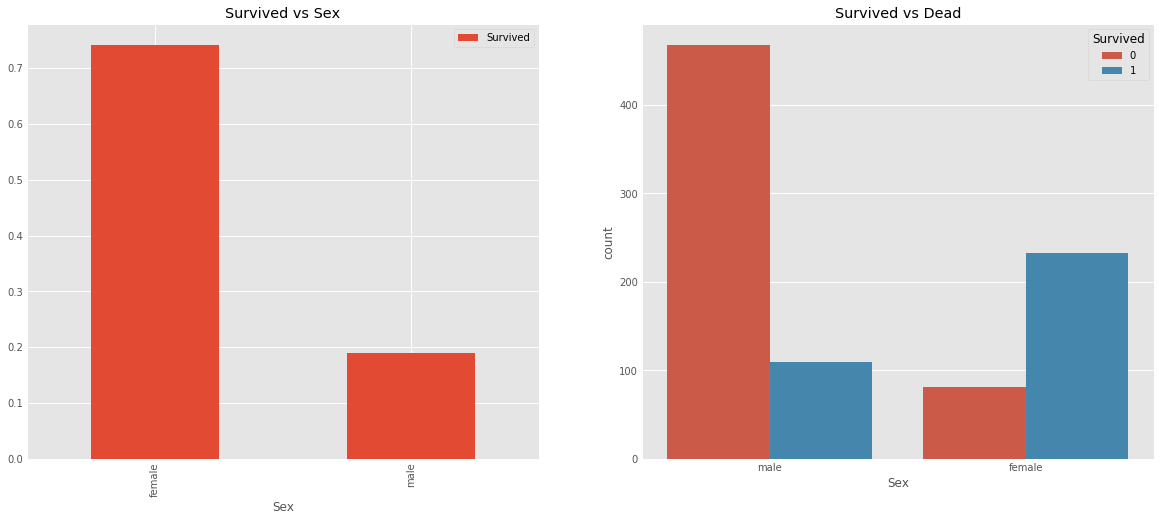

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

Похоже мы нашли нечто интересное. Во первых, количество мужчин на корабле сильно больше чем женьщин. Еще, количество спасенных женьщин в два раза больше чем мужчин. В среднем женьщина спасется с вероятностью в 75%, а мужчина с вероятностью 19%. Боль.

Эта фича выглядит давольно важной, посмотрим остальные.

### Класс состоятельности

1st = Высший класс

2nd = Средний класс

3rd = Низший класс

In [16]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891
